# Neural network regression

Neural networks have become very popular recently due to the advent of high performance GPU algorithms for their application. Modern applications of neural networks often use very large networks, but in this sample we will demonstrate the possibilities using a network with a single hidden layer.

The general idea of a neural network is shown in the picture below:

<img src="nn.png" width=50%>

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

We have one input and one output, but we have a choice about how many neurons to have in the hidden layer.

In [2]:
Nhidden = 10

We need to create weights between each input neuron and each hidden neuron as well as each hidden neuron and each output neuron.

In [3]:
w_in_hidden = numpy.random.rand(Nhidden)
w_hidden_out = numpy.random.rand(Nhidden)

We also need a bias for the hidden layer and the output layer

In [4]:
bias_hidden = numpy.random.rand()
bias_output = numpy.random.rand()

We will use a sigmoidal activation function:

In [5]:
def sigmoid(i):
    expi = numpy.exp(-i)
    return ((1 - expi)/(1 + expi))

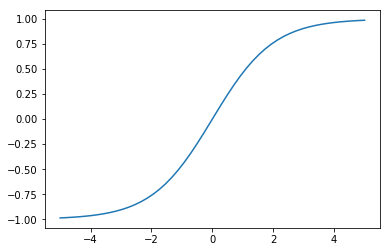

In [6]:
x = numpy.linspace(-5, 5)
plt.plot(x, sigmoid(x))

To calculate the output of a neuron, we take the weighted sum of its inputs and apply the activation function. We can do this all simulateously with numpy arrays:

In [7]:
def network_output(u, w_in_hidden, w_hidden_out, bias_hidden, bias_output):
    h = sigmoid((w_in_hidden*u + bias_hidden).sum())
    y = sigmoid((w_hidden_out*h + bias_output).sum())
    
    return y

In [8]:
network_output(0.1, w_in_hidden, w_hidden_out, bias_hidden, bias_output)

0.99983492698210907

Let's find the weights and bias to regress a function:

In [9]:
known_u = numpy.linspace(-1, 1)
known_y = numpy.sin(known_u*numpy.pi/2)*0.8 + numpy.random.randn(len(known_u))*0.05

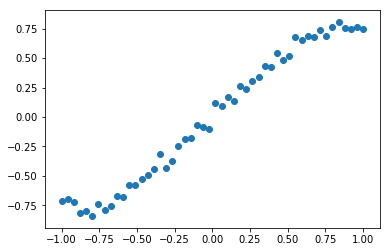

In [10]:
plt.scatter(known_u, known_y)

In [11]:
import scipy.optimize

Since we're going to use optimisation functions which take an array, we need to be able to 

In [12]:
def pack(w_in_hidden, w_hidden_out, bias_hidden, bias_output):
    return numpy.concatenate([w_in_hidden, 
                              w_hidden_out, 
                              numpy.array([bias_hidden]), 
                              numpy.array([bias_output])])

def unpack(parameters):
    parts = numpy.split(parameters, [Nhidden, 2*Nhidden, 2*Nhidden + 1])
    return parts

In [13]:
p0 = pack(w_in_hidden, w_hidden_out, bias_hidden, bias_output)

In [14]:
def predict(parameters, us):
    w_in_hidden, w_hidden_out, bias_hidden, bias_output = unpack(parameters)
    return numpy.array([network_output(u, w_in_hidden, w_hidden_out, bias_hidden, bias_output) for u in us])

In [29]:
def plotfit(predictions):
    plt.scatter(known_u, known_y, alpha=0.4)
    plt.plot(known_u, predictions)

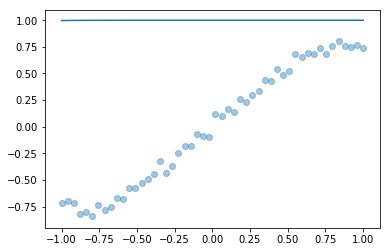

In [32]:
plotfit(predict(p0, known_u))

In [16]:
def errorfunction(parameters):
    return known_y - predict(parameters, known_u)

In [ ]:
result = scipy.optimize.least_squares(errorfunction, p0)

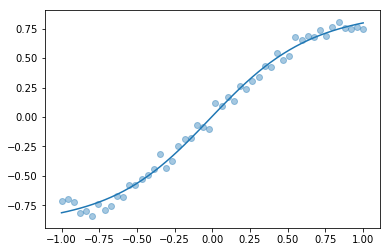

In [33]:
plotfit(predict(result.x, known_u))

## Scikit-learn

As I've mentioned before, you're probably better off using a library for things like this. The Scikit-Learn library has neural network regression built in.

In [35]:
import sklearn
import sklearn.neural_network

In [19]:
net = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=Nhidden,
                                          activation='tanh', 
                                          solver='lbfgs', max_iter=1000, learning_rate_init=0.001)

In [20]:
observations = numpy.atleast_2d(known_u).T

In [21]:
net.fit(observations, known_y)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

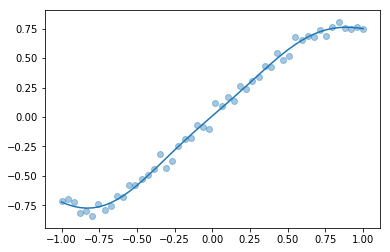

In [34]:
plotfit(net.predict(observations))

## Keras

The Keras library offers additinal flexibility, but is not installed by default in Anaconda. 

In [36]:
import keras

In [37]:
model = keras.models.Sequential()

In [38]:
model.add(keras.layers.Dense(Nhidden, input_shape=(1,), activation='tanh'))
model.add(keras.layers.Dense(1, activation='tanh'))

In [39]:
model.compile(optimizer='rmsprop', loss='mse')

In [40]:
model.fit(known_u, known_y, epochs=1000, verbose=False)

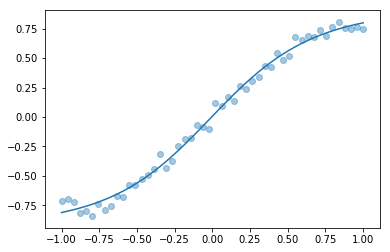

In [41]:
plt.scatter(known_u, known_y, alpha=0.4)
plt.plot(known_u, model.predict(known_u))